In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper
import util.trading_systems as ts

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research']


In [70]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)

In [71]:
len(results)

2115

In [72]:
results['Abyssal_whip'].keys()

dict_keys(['sma', 'buyAndHold', 'startMAE', 'predictions', 'persist', 'endMAE', 'sma_model', 'stochOscil', 'numPrices', 'budget', 'momentum_model', 'testPrices', 'momentum', 'endLoss', 'numEpochs', 'startLoss', 'model_opt', 'perfect', 'opt_params', 'item', 'model', 'stochOscil_model'])

In [73]:
scaler = StandardScaler()
item = "Abyssal_whip"
r = results[item]

[2997946, 2993826, 2993917, 2989844, 2974549, 2966749, 2952918, 2943329, 2930509, 2915405, 2906959, 2893127, 2885994, 2889130, 2886484, 2885645, 2875258, 2869277, 2860602, 2852459, 2835066, 2829230, 2821502, 2818233, 2812989, 2807540, 2802641.5, 2797743, 2757566.0, 2717389, 2676513, 2622456, 2563800, 2516323, 2538287, 2549740, 2548555, 2622266, 2726996, 2750636, 2745540, 2708548, 2689622, 2663958, 2643140, 2626840, 2614224, 2606262, 2593007, 2593049, 2587581, 2581066, 2581709, 2582081, 2581074, 2594930, 2593254, 2601195, 2608747, 2622746, 2620039.0, 2617332, 2606839, 2594463, 2585198, 2584995.0, 2584792, 2582843, 2580361, 2575459, 2567439, 2562848, 2556456, 2562819, 2563797, 2557282, 2563221, 2560645.5, 2558070, 2569625, 2568837, 2563847, 2579175, 2656631, 2642802, 2645712, 2665135, 2681647, 2694474, 2722003, 2752399, 2747085, 2742973, 2738534, 2744725, 2792435, 2776659, 2776268, 2776268, 2783244, 2790107, 2846461, 2818586, 2818586, 2821731, 2820463, 2820463, 2799327.6666666665, 277819

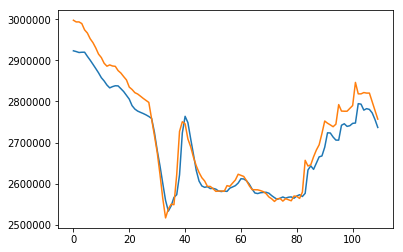

In [74]:
scaler.fit(np.array(r['testPrices'])[:, np.newaxis])
p = scaler.inverse_transform(np.array(r['predictions'])[:, np.newaxis])
plt.plot(p)
plt.plot(r['testPrices'])
plt.show()

lengths 110 110 110
0.2238880418935017


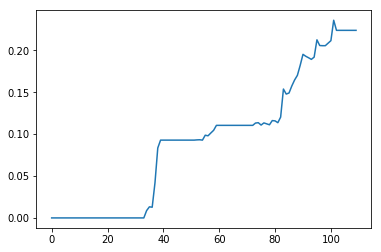

In [83]:
test_prices = r['testPrices']
budget = test_prices[0]*101-1
y_pred = r['predictions']
buySigs = [y_pred[i+5] >= y_pred[i] for i in range(0, len(y_pred)-5)]
buySigs = buySigs + [False]*5
sellSigs = [y_pred[i+5] <= y_pred[i] for i in range(0, len(y_pred)-5)]
sellSigs = sellSigs + [False]*5
print("lengths", len(buySigs), len(sellSigs), len(test_prices))
profit = ts.modelProfit(buySigs, sellSigs, test_prices, budget)
print(profit[-1])
plt.plot(profit)
plt.show()

In [77]:
modelProfs = [(item,results[item]['model']) for item in results ]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)
modelProfs_opt = [(item,results[item]['model_opt']) for item in results ]
modelProfs_opt = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [78]:
pprint(modelProfs[0:10])

[('Ring_mould', 19.332506203473944),
 ('Mind_talisman', 16.67655379339906),
 ('Shears', 10.717901687454145),
 ('Necklace_mould', 5.763350559862188),
 ('Amulet_mould', 5.273201251303441),
 ('Cleaning_cloth', 4.807556704665648),
 ('Royal_crown', 4.7404254504408865),
 ('Shantay_pass', 4.64188351920694),
 ('Vampyre_dust', 4.537762174813214),
 ('Bronze_kiteshield', 3.7417218543046356)]


In [10]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results ]
mod_optVSpers = [(item,results[item]['model_opt']-results[item]['persist']) for item in results ]
mod_optVSbah = [(item,results[item]['model_opt']-results[item]['buyAndHold']) for item in results ]

In [11]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)
mod_optVSpers = sorted(mod_optVSpers, key=lambda x: x[1], reverse=True)
mod_optVSbah = sorted(mod_optVSbah, key=lambda x: x[1], reverse=True)

In [12]:
pprint(modVSpers[0:10])
pprint(mod_optVSpers[0:10])

[('Shantay_pass', 3.5576208178438664),
 ('Leather_chaps', 1.9),
 ('Feather', 1.205298013245033),
 ("Bob's_green_shirt", 1.0706595357428361),
 ('Basket', 1.056384742951907),
 ('Royal_sceptre', 1.0197804949123275),
 ('Cadavaberry_seed', 0.9800995024875623),
 ('Fishing_potion(1)', 0.8846000384223204),
 ('Big_pirate_hat', 0.8671576605729808),
 ("Bob's_purple_shirt", 0.8469344141446695)]
[('Leather_cowl', 5.664179104477611),
 ('Redberry_seed', 4.5),
 ('Yanillian_seed', 3.089387934830471),
 ('Jute_seed', 2.2141768292682924),
 ('Leather_chaps', 1.9),
 ('Basket', 1.2703150912106136),
 ('Feather', 1.2019867549668874),
 ('Marigold_seed', 1.1699999999999997),
 ('Jug_of_wine', 1.153973509933775),
 ('Rosemary_seed', 1.0248756218905473)]


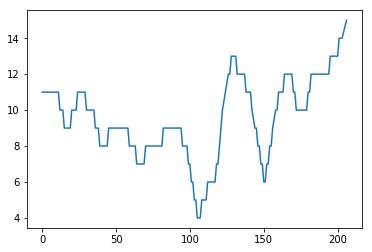

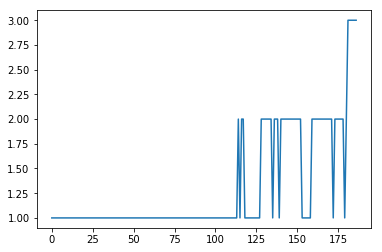

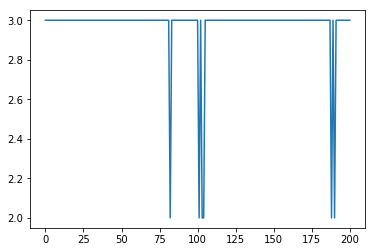

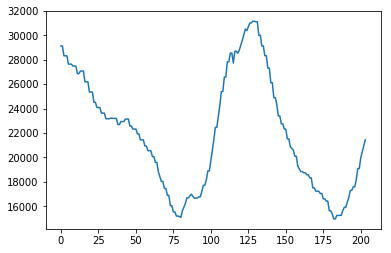

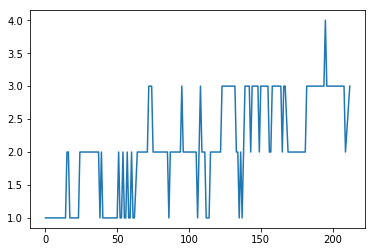

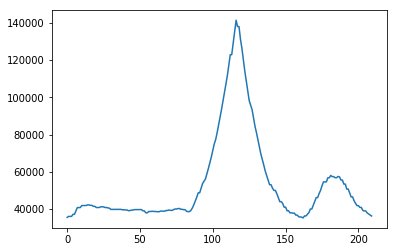

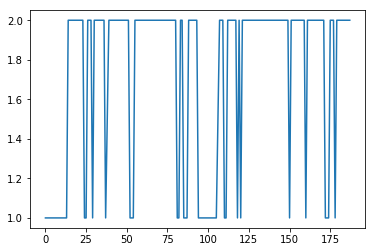

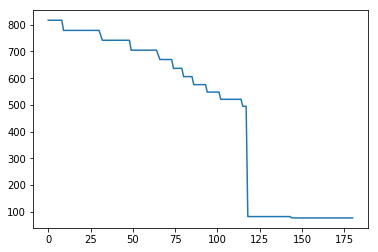

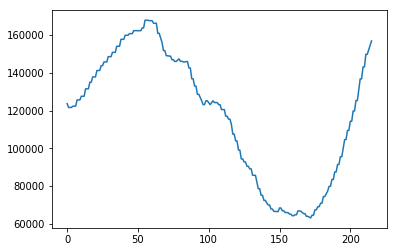

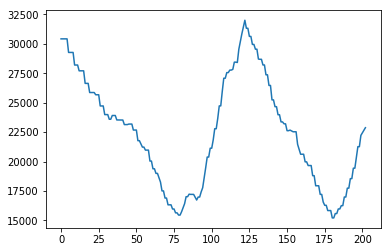

In [13]:
for a in modVSpers[0:10]:
    prices = items.getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

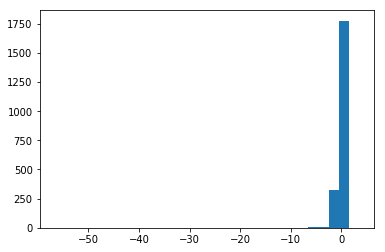

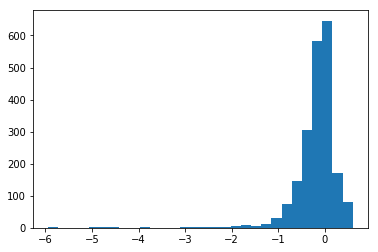

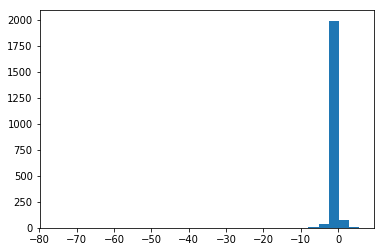

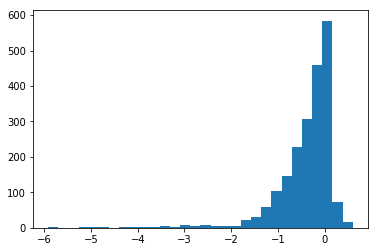

In [14]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers],30)
plt.show()
plt.hist([a[1] for a in mod_optVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()

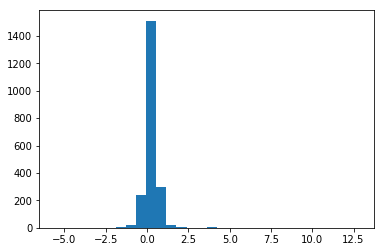

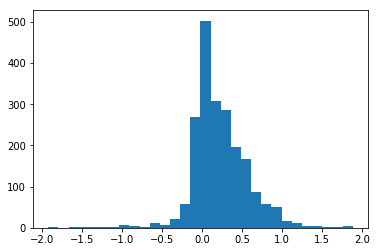

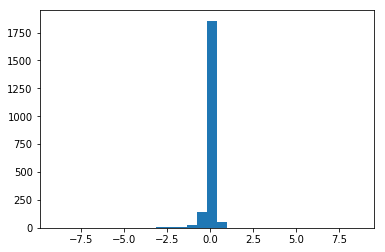

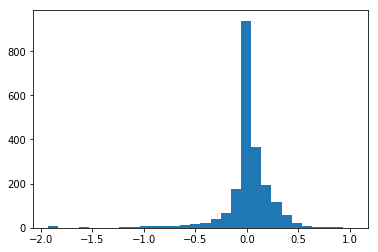

In [15]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in mod_optVSbah],30)
plt.show()
plt.hist([a[1] for a in mod_optVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [16]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])
numProfModels_opt = len([a for a in modelProfs_opt if a[1]>0])
numProfmod_optVSpers = len([a for a in mod_optVSpers if a[1]>0])
numProfmod_optVSbah = len([a for a in mod_optVSbah if a[1]>0])

In [17]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))
print(numProfModels_opt/len(results))
print(numProfmod_optVSpers/len(results))
print(numProfmod_optVSbah/len(results))

2115
0.6056737588652482
0.2765957446808511
0.7130023640661939
0.6056737588652482
0.16501182033096926
0.5943262411347517


In [18]:
actualModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

actualPersProfs = [(item,items.getPrices(item)[-1]*results[item]['persist']) for item in results if items.getPrices(item)[-1]<10000000]
actualPersProfs = sorted(actualPersProfs, key=lambda x: x[1], reverse=True)

actualPersVsModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000 and (results[item]['model']-results[item]['persist'])>0]
actualPersVsModProfs = sorted(actualPersVsModProfs, key=lambda x: x[1], reverse=True)

In [19]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)
actualPersProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['persist'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualPersProfsPerDay = sorted(actualPersProfsPerDay, key=lambda x: x[1], reverse=True)

In [20]:
pprint(actualModProfs[0:10])
pprint(actualPersProfs[0:10])
pprint(actualPersVsModProfs[0:10])

[('Serpentine_helm_(uncharged)', 2515649.242637036),
 ("Rangers'_tunic", 2436429.8746378575),
 ('Royal_crown', 2164108.5074861743),
 ("Pharaoh's_sceptre_(3)", 2081489.2592292032),
 ("Pharaoh's_sceptre", 2050716.4349413025),
 ('Magic_fang', 1985070.1970599336),
 ('Uncharged_toxic_trident', 1983897.985325594),
 ("Ahrim's_armour_set", 1873050.4311230397),
 ('Staff_of_the_dead', 1808423.626614082),
 ('Gilded_boots', 1626321.6194165086)]
[('Serpentine_visage', 5817749.813161366),
 ('Serpentine_helm_(uncharged)', 5134778.866578279),
 ('Magic_fang', 4767291.653409718),
 ('Uncharged_toxic_trident', 4716469.549179112),
 ("Pharaoh's_sceptre_(3)", 4330693.076001602),
 ('Staff_of_the_dead', 3794598.6434102836),
 ('Toxic_staff_(uncharged)', 3667853.8810922964),
 ("Rangers'_tunic", 3392742.575265963),
 ("Pharaoh's_sceptre", 3104193.505455687),
 ('Smouldering_stone', 2620735.154413975)]
[("Ahrim's_armour_set", 1873050.4311230397),
 ('Gilded_boots', 1626321.6194165086),
 ("Saradomin's_tear", 1205382.9

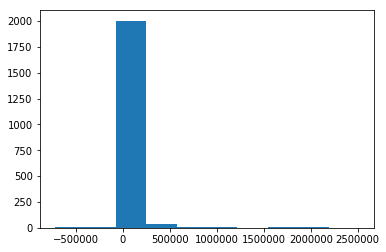

In [21]:
plt.hist([a[1] for a in actualModProfs])
plt.show()

In [27]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
sma = [results[item]['sma'] for item in results]
stochOscil = [results[item]['stochOscil'] for item in results]
momentum = [results[item]['momentum'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [29]:
print(np.mean(profs))
print(np.median(profs))
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profs,sma',np.corrcoef(profs,sma)[0][1])
print('profs,stochOscil',np.corrcoef(profs,stochOscil)[0][1])
print('profs,momentum',np.corrcoef(profs,momentum)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

0.20985013141736422
0.04862925050005874
price,profs -0.015954070623778273
bl,price -0.05144175220748757
prof,pers 0.8301196606719506
profs,perf -0.031645741746128865
profs,bah 0.6097817399996706
profs,sma 0.7793851687511929
profs,stochOscil 0.6207195089061698
profs,momentum 0.5491037510351288
profdiff,mae 0.06058094731635594
prices,mae -0.0030459703689468304
profs,mae -0.19691078808605428
profdiff,mae 0.06058094731635594


In [30]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']>results[item]['persist']]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']>results[item]['persist']]
profs = [results[item]['model'] for item in results if results[item]['model']>results[item]['persist']]
pers = [results[item]['persist'] for item in results if results[item]['model']>results[item]['persist']]
perf = [results[item]['perfect'] for item in results if results[item]['model']>results[item]['persist']]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']>results[item]['persist']]
sma = [results[item]['sma'] for item in results if results[item]['model']>results[item]['persist']]
stochOscil = [results[item]['stochOscil'] for item in results if results[item]['model']>results[item]['persist']]
momentum = [results[item]['momentum'] for item in results if results[item]['model']>results[item]['persist']]
mae = [results[item]['endMAE'] for item in results if results[item]['model']>results[item]['persist']]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']>results[item]['persist']]

In [31]:
print(np.mean(profs))
print(np.median(profs))
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profs,sma',np.corrcoef(profs,sma)[0][1])
print('profs,stochOscil',np.corrcoef(profs,stochOscil)[0][1])
print('profs,momentum',np.corrcoef(profs,momentum)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

0.19172824621053042
0.03125526334785015
price,profs -0.02555705055832246
bl,price -0.060581819390715025
prof,pers 0.9511732140865589
profs,perf 0.0025139222328866687
profs,bah 0.8028097510245757
profs,sma 0.9528092085312406
profs,stochOscil 0.9057003646294701
profs,momentum 0.29813671869899133
profdiff,mae 0.14096497536598684
prices,mae -0.01193479140658934
profs,mae -0.13728136140971323
profdiff,mae 0.14096497536598684


In [ ]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']>0]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']>0]
profs = [results[item]['model'] for item in results if results[item]['model']>0]
pers = [results[item]['persist'] for item in results if results[item]['model']>0]
perf = [results[item]['perfect'] for item in results if results[item]['model']>0]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']>0]
mae = [results[item]['endMAE'] for item in results if results[item]['model']>0]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']>0]

In [ ]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

In [ ]:
prices = [items.getPrices(item)[-1] for item in results if results[item]['model']<0]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results if results[item]['model']<0]
profs = [results[item]['model'] for item in results if results[item]['model']<0]
pers = [results[item]['persist'] for item in results if results[item]['model']<0]
perf = [results[item]['perfect'] for item in results if results[item]['model']<0]
bah = [results[item]['buyAndHold'] for item in results if results[item]['model']<0]
mae = [results[item]['endMAE'] for item in results if results[item]['model']<0]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results if results[item]['model']<0]

In [ ]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])